<a href="https://colab.research.google.com/github/GustavoEmanuel901/Aulas-ML/blob/main/Aula2ML_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as SM

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

hue='classes'
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['classes'] = wine.target

# Teste Normalização

In [ ]:
from sklearn.preprocessing import normalize

normalize([wine_df['classes']], norm="l1")

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06166264,
        0.06166264, 0.06166264, 0.06166264, 0.06166264, 0.06166264,
        0.06166264, 0.06166264, 0.06166264, 0.06166264, 0.06166264,
        0.06166264, 0.06166264, 0.06166264, 0.06

# Carregar dados

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = load_wine()
X = data.data
y = data.target

# Dividir em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (opcional, mas comum para muitos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Wrapper

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split

# Usando um RandomForest como estimador base
model = RandomForestClassifier()

# Aplicando RFE com 5 atributos selecionados
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Exibir os atributos selecionados
print("Atributos selecionados (RFE):", selector.support_)
print("Ranking dos atributos:", selector.ranking_)

# Avaliação do modelo
print("Score no conjunto de treino (RFE):", selector.score(X_train, y_train))
print("Score no conjunto de teste (RFE):", selector.score(X_test, y_test))

Atributos selecionados (RFE): [ True False False False False False  True False False  True False  True
  True]
Ranking dos atributos: [1 7 8 6 4 3 1 9 5 1 2 1 1]
Score no conjunto de treino (RFE): 1.0
Score no conjunto de teste (RFE): 0.9629629629629629


# FILTRO


In [ ]:
k = 5  # Número de atributos a serem selecionados
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Mostrar quais atributos foram selecionados
selected_features = selector.get_support(indices=True)
print("Índices dos atributos selecionados:", selected_features)

# Exibir os nomes das colunas selecionadas
selected_columns = pd.DataFrame(X_train, columns=data.feature_names).columns[selected_features]
print("Atributos selecionados:", selected_columns.tolist())

Índices dos atributos selecionados: [ 0  6  9 11 12]
Atributos selecionados: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']


# PCA


In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Aqui vamos reduzir para 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Adicionar a coluna da classe (alvo)
df_pca['target'] = y

# Visualizar a variância explicada pelos componentes principais
print("Variância explicada por cada componente principal:", pca.explained_variance_ratio_)

# Exibir os primeiros resultados
print(df_pca.head())


Variância explicada por cada componente principal: [0.36198848 0.1920749 ]
        PC1       PC2  target
0  3.316751 -1.443463       0
1  2.209465  0.333393       0
2  2.516740 -1.031151       0
3  3.757066 -2.756372       0
4  1.008908 -0.869831       0


# PCA PLOTS


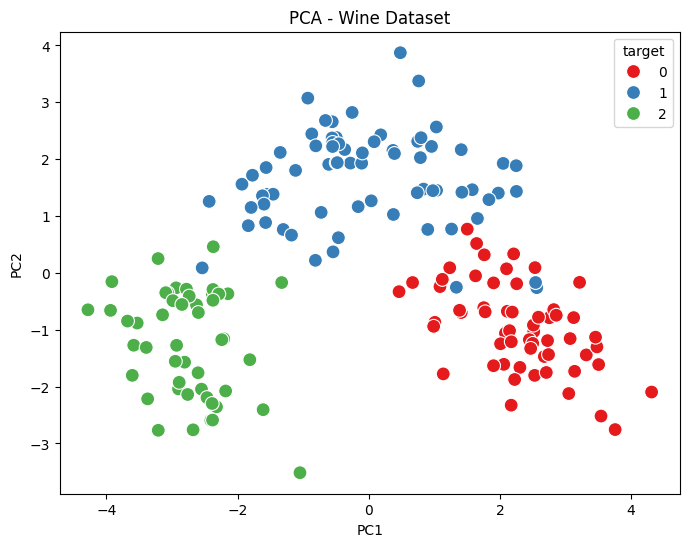

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot dos componentes principais
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=100)
plt.title('PCA - Wine Dataset')
plt.show()

# RANDOM PROJECTION

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_projection = GaussianRandomProjection(n_components=5, random_state=42)
X_train_projected = random_projection.fit_transform(X_train_scaled)
X_test_projected = random_projection.transform(X_test_scaled)

# Verificar as dimensões dos dados
print(f"Dimensões originais: {X_train_scaled.shape}")
print(f"Dimensões após Random Projection: {X_train_projected.shape}")

# Usar um modelo simples (Regressão Logística) para verificar o impacto da transformação
model = LogisticRegression()
model.fit(X_train_projected, y_train)
score = model.score(X_test_projected, y_test)

print(f"Acurácia após Random Projection: {score * 100:.2f}%")

Dimensões originais: (124, 13)
Dimensões após Random Projection: (124, 5)
Acurácia após Random Projection: 98.15%


# Gráfico

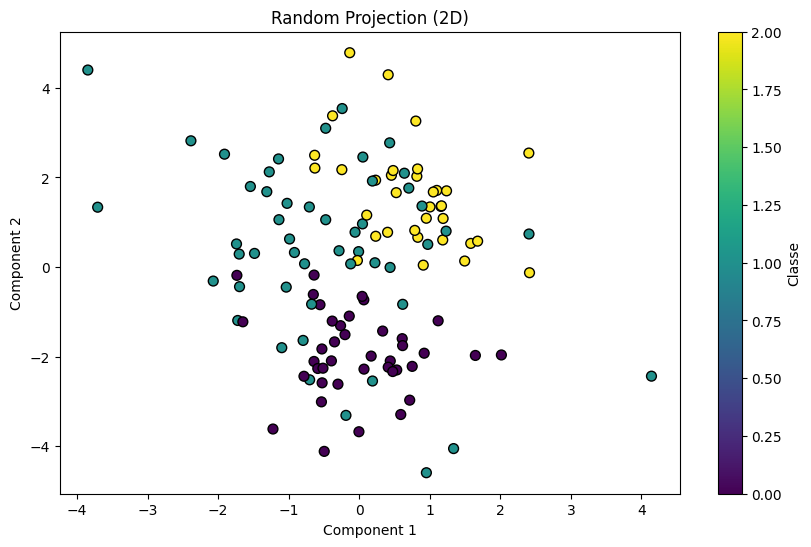

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Random Projection (2D)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Adicionar uma barra de cores para a legenda
plt.colorbar(scatter, label='Classe')

plt.show()
